In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/aML/airbnb.csv')

print("-----Dataset Info:")
print(df.info())

print("\n-----First few rows:")
print(df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
-----Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       51707 non-null  float64
 1   room_shared                 51707 non-null  bool   
 2   room_private                51707 non-null  bool   
 3   person_capacity             51707 non-null  int64  
 4   host_is_superhost           51707 non-null  bool   
 5   multipleRooms               51707 non-null  bool   
 6   businessListing             51707 non-null  bool   
 7   cleanliness_rating          51707 non-null  int64  
 8   guest_satisfaction_overall  51707 non-null  int64  
 9   city_dist                   51707 non-null  float64
 10  metro_dist                  51707 non-null  float64
 1

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = [20, 12]

fig, axes = plt.subplots(2, 3)
axes = axes.ravel()

# 1. Price Distribution (Normal Scale)
price_cutoff = 2000
sns.histplot(data=df[df['price'] <= price_cutoff], x='price', bins=50, ax=axes[0])
axes[0].set_title(f'Distribution of Price (≤ {price_cutoff})\nHighly right-skewed, hard to see structure')
axes[0].set_xlabel('Price (€)')
axes[0].axvline(df['price'].median(), color='red', linestyle='--', alpha=0.5, label='Median')
axes[0].axvline(df['price'].mean(), color='green', linestyle='--', alpha=0.5, label='Mean')
axes[0].legend()

# 2. Price Distribution (Log Scale)
bins_log = np.logspace(np.log10(df['price'].min()), np.log10(df['price'].max()), 80)
sns.histplot(data=df, x='price', bins=bins_log, ax=axes[1])
axes[1].set_xscale('log')
axes[1].set_title('Distribution of Price (Log Scale)\nMore normally distributed, structure visible')
axes[1].set_xlabel('Price (€) - Log Scale')

axes[1].axvline(np.exp(np.mean(np.log(df['price']))), color='green', linestyle='--', alpha=0.5, label='Geometric Mean')
axes[1].axvline(df['price'].median(), color='red', linestyle='--', alpha=0.5, label='Median')
axes[1].legend()

# 3. Cleanliness Rating
sns.histplot(data=df, x='cleanliness_rating',
            bins=range(int(df['cleanliness_rating'].min()),
                      int(df['cleanliness_rating'].max()) + 2),
            discrete=True, ax=axes[2])
axes[2].set_title('Distribution of Cleanliness Rating')

# 4. Guest Satisfaction
sns.histplot(data=df, x='guest_satisfaction_overall',
            bins=range(int(df['guest_satisfaction_overall'].min()),
                      int(df['guest_satisfaction_overall'].max()) + 2),
            discrete=True, ax=axes[3])
axes[3].set_title('Distribution of Guest Satisfaction')

# 5. City Distance with cutoff
city_dist_cutoff = 10
sns.histplot(data=df[df['city_dist'] <= city_dist_cutoff], x='city_dist', bins=50, ax=axes[4])
axes[4].set_title(f'Distribution of City Distance (≤ {city_dist_cutoff} km)')

# 6. Metro Distance with cutoff
metro_dist_cutoff = 2
sns.histplot(data=df[df['metro_dist'] <= metro_dist_cutoff], x='metro_dist', bins=50, ax=axes[5])
axes[5].set_title(f'Distribution of Metro Distance (≤ {metro_dist_cutoff} km)')

plt.tight_layout()
plt.show()

In [ ]:

print("Missing values:\n")
print(df.isnull().sum())
print("\nPercentage of missing values:\n")
print(df.isnull().sum() / len(df) * 100)

# Handle outliers for numerical columns
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply outlier handling
for col in ['price', 'city_dist', 'metro_dist']:
    df = handle_outliers(df, col)

print("\nLogical Consistency Check:")
print("Rows where both room_private and room_shared are True:")
print(df[df.room_private & df.room_shared].shape[0])


Missing values:

price                         0
room_shared                   0
room_private                  0
person_capacity               0
host_is_superhost             0
multipleRooms                 0
businessListing               0
cleanliness_rating            0
guest_satisfaction_overall    0
city_dist                     0
metro_dist                    0
city                          0
time_period                   0
entire_home                   0
is_luxury                     0
log_price                     0
dtype: int64

Percentage of missing values:

price                         0.0
room_shared                   0.0
room_private                  0.0
person_capacity               0.0
host_is_superhost             0.0
multipleRooms                 0.0
businessListing               0.0
cleanliness_rating            0.0
guest_satisfaction_overall    0.0
city_dist                     0.0
metro_dist                    0.0
city                          0.0
time_period       

In [ ]:
# One-hot encoding for city
df_encoded = pd.get_dummies(df, columns=['city'], prefix='city')

# Binary encoding for time_period
df_encoded['is_weekend'] = (df_encoded['time_period'] == 'weekends').astype(int)

# Create stratification column combining city and time_period
df_encoded['strat_column'] = df['city'] + '_' + df['time_period']
df_encoded.drop(['time_period', 'strat_column'], axis=1, inplace=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51707 entries, 0 to 51706
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price                       51707 non-null  float64
 1   room_shared                 51707 non-null  bool   
 2   room_private                51707 non-null  bool   
 3   person_capacity             51707 non-null  int64  
 4   host_is_superhost           51707 non-null  bool   
 5   multipleRooms               51707 non-null  bool   
 6   businessListing             51707 non-null  bool   
 7   cleanliness_rating          51707 non-null  int64  
 8   guest_satisfaction_overall  51707 non-null  int64  
 9   city_dist                   51707 non-null  float64
 10  metro_dist                  51707 non-null  float64
 11  time_period                 51707 non-null  object 
 12  entire_home                 51707 non-null  bool   
 13  is_luxury                   517

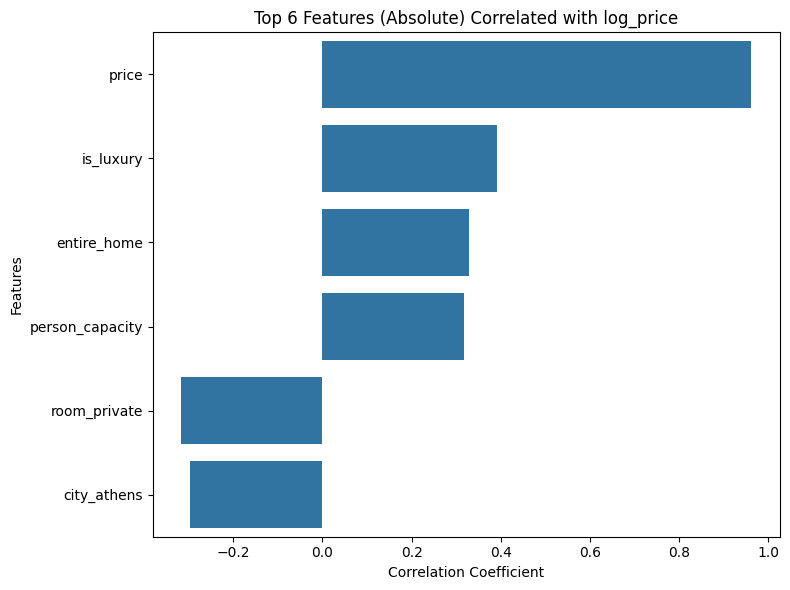

In [ ]:
# Correlation Matrix

corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#  Top 6 correlated features
corr_with_target = corr_matrix['log_price'].drop('log_price')
strongest_corr_features = corr_with_target.abs().sort_values(ascending=False).head(6)

top_6_corr = corr_with_target[strongest_corr_features.index]

plt.figure(figsize=(8, 6))
sns.barplot(x=top_6_corr.values, y=top_6_corr.index, orient='h')
plt.title("Top 6 Features (Absolute) Correlated with log_price")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# 6 features with the lowest correlation
lowest_corr_features = corr_with_target.abs().sort_values(ascending=True).head(6)

lowest_6_corr = corr_with_target[lowest_corr_features.index]

plt.figure(figsize=(8, 6))
sns.barplot(x=lowest_6_corr.values, y=lowest_6_corr.index, orient='h')
plt.title("6 Features with the Lowest (Absolute) Correlation to log_price")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

In [ ]:
# Separate features and target
X = df_encoded.drop(['price', 'log_price', 'time_period', 'strat_column'], axis=1)
y = df_encoded['log_price']  # Using log_price as target

# Perform stratified split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=df_encoded['strat_column']
)

In [ ]:
# Initialize scaler
scaler = StandardScaler()

numerical_cols = ['person_capacity', 'cleanliness_rating',
                 'guest_satisfaction_overall', 'city_dist', 'metro_dist']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Save the fitted scaler for future use (kinda unnecessary as this is a standard scaler that can just be imported)
import joblib
scaler_filename = "/content/drive/MyDrive/aML/airbnb_scaler.pkl"
joblib.dump(scaler, scaler_filename)

['/content/drive/MyDrive/aML/airbnb_scaler.pkl']

In [ ]:
# Verify stratification worked
print("\nCity-Period Distribution in Full Dataset:")
print(df_encoded['strat_column'].value_counts(normalize=True).head())

print("\nCity-Period Distribution in Training Set:")
print(X_train.join(df_encoded['strat_column'])['strat_column'].value_counts(normalize=True).head())

print("\nCity-Period Distribution in Test Set:")
print(X_test.join(df_encoded['strat_column'])['strat_column'].value_counts(normalize=True).head())

# Print final shapes
print("\nFinal shapes:")
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

# Verify scaling worked
print("\nNumerical features statistics in training set:")
print(X_train[numerical_cols].describe())

# Display all columns in final training data
print("\nAll columns in training set:")
print("\nTotal number of features:", len(X_train.columns))
print("\nFeature names:")
for i, col in enumerate(X_train.columns, 1):
    print(f"{i}. {col}")

# Group columns by type
print("\nColumns grouped by type:")
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
boolean_features = X_train.select_dtypes(include=['bool']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

print("\nNumerical features:")
print(list(numerical_features))
print("\nBoolean features:")
print(list(boolean_features))
print("\nCategorical features:")
print(list(categorical_features))

# Display shape of target variable
print("\nTarget variable:")
print(f"log_price: {y_train.shape}")



df_encoded.head(5)


City-Period Distribution in Full Dataset:
strat_column
london_weekends    0.104028
london_weekdays    0.089234
rome_weekends      0.087706
rome_weekdays      0.086874
paris_weekends     0.068811
Name: proportion, dtype: float64

City-Period Distribution in Training Set:
strat_column
london_weekends    0.104025
london_weekdays    0.089230
rome_weekends      0.087707
rome_weekdays      0.086885
paris_weekends     0.068802
Name: proportion, dtype: float64

City-Period Distribution in Test Set:
strat_column
london_weekends    0.104042
london_weekdays    0.089248
rome_weekends      0.087701
rome_weekdays      0.086830
paris_weekends     0.068845
Name: proportion, dtype: float64

Final shapes:
X_train: (41365, 23)
X_test: (10342, 23)
y_train: (41365,)
y_test: (10342,)

Numerical features statistics in training set:
       person_capacity  cleanliness_rating  guest_satisfaction_overall  \
count     4.136500e+04        4.136500e+04                4.136500e+04   
mean      9.997241e-17        

price  room_shared  room_private  person_capacity  host_is_superhost  \
0  576.107456        False         False                2               True   
1  576.107456        False         False                2              False   
2  576.107456        False         False                3               True   
3  576.107456        False          True                2              False   
4  576.107456        False          True                2              False   

   multipleRooms  businessListing  cleanliness_rating  \
0          False             True                  10   
1          False            False                   9   
2          False             True                  10   
3          False            False                   9   
4          False            False                   9   

   guest_satisfaction_overall  city_dist  ...  city_barcelona city_berlin  \
0                         100   1.196536  ...           False       False   
1                         100   4.602378  ...           False       False   
2                          95   0.269101  ...           False       False   
3                          87   2.239501  ...           False       False   
4                          87   2.239486  ...           False       False   

   city_budapest  city_lisbon  city_london  city_paris  city_rome  \
0          False        False        False       False      False   
1          False        False        False        True      False   
2          False        False         True       False      False   
3          False        False        False       False      False   
4          False        False        False       False      False   

   city_vienna  is_weekend     strat_column  
0        False           0  athens_weekdays  
1        False           0   paris_weekdays  
2        False           0  london_weekdays  
3         True           0  vienna_weekdays  
4         True           1  vienna_weekends  

[5 rows x 27 columns]